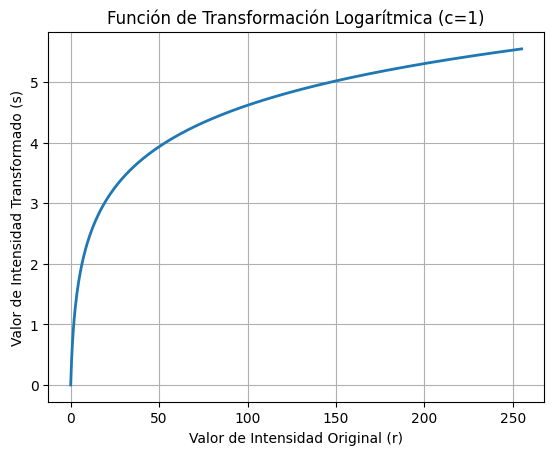

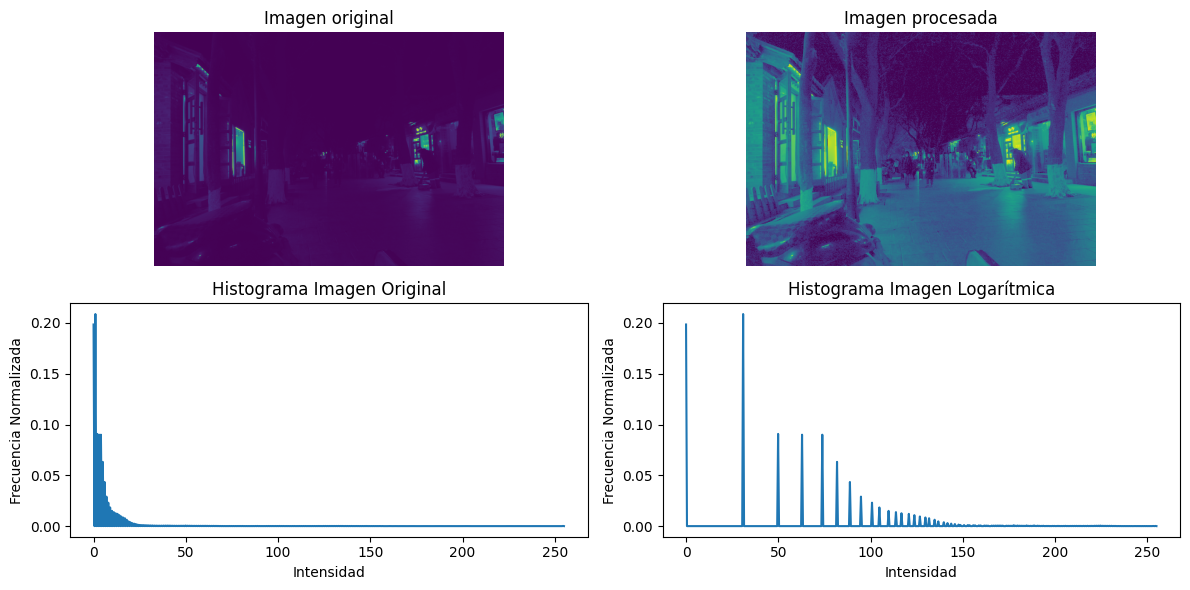

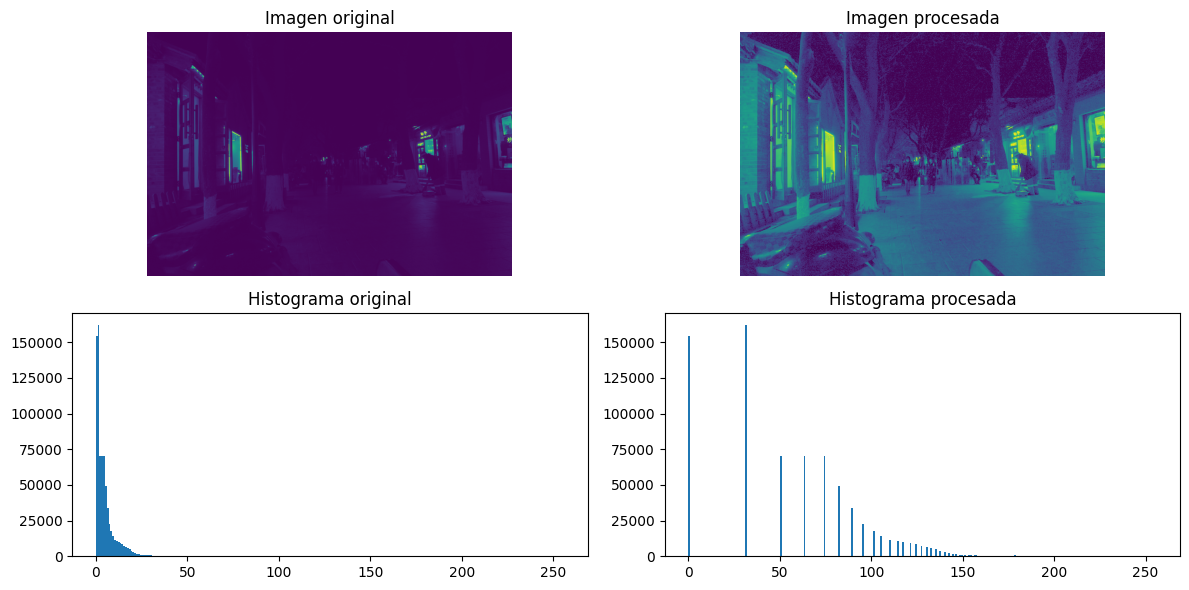

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from helpers import mostrar

# Leer la imagen y convertirla a escala de grises
I = cv2.imread('Imagen2_original.png', cv2.IMREAD_GRAYSCALE)

# Convertir a tipo float para aplicar la transformación
I = I.astype(np.float64)

# Parámetro de la transformación logarítmica
c = 1  # Factor de escala

nbins = 512

# Función de transformación logarítmica
r = np.linspace(0, np.max(I), nbins)   # Crear un rango de intensidades
s = c * np.log(1 + r)                  # Aplicar la transformación logarítmica

# Graficar la función de transformación logarítmica
plt.figure()
plt.plot(r, s, linewidth=2)
plt.xlabel('Valor de Intensidad Original (r)')
plt.ylabel('Valor de Intensidad Transformado (s)')
plt.title('Función de Transformación Logarítmica (c=1)')
plt.grid(True)
plt.show()

# Aplicar la transformación logarítmica a la imagen
I_log = c * np.log(1 + I)

# Normalizar para mostrar la imagen transformada correctamente
#I_log_norm = cv2.normalize(I_log, None, 0, 255, cv2.NORM_MINMAX)
#I_log_norm = I_log_norm.astype(np.uint8)
# Normalizar al rango [0, 255] para visualizar
I_log_norm = (I_log - np.min(I_log)) / (np.max(I_log) - np.min(I_log)) * 255
I_log_norm = I_log_norm.astype(np.uint8)

mostrar.mostrarNormalizado(I,I_log_norm)

cv2.imwrite("foto2_procesada.png", I_log_norm)
mostrar.mostrar(I.astype(np.uint8),I_log_norm.astype(np.uint8))